<a href="https://colab.research.google.com/github/twishackaul/mobilenet_v2-Testing/blob/main/mobilenet_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import PIL.Image as Image
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
Image_Shape = (224, 224)   # image shape = [(224, 224), 3]

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",
                   input_shape = Image_Shape+(3,))
])

In [4]:
input_shape = Image_Shape+(3,)
input_shape

(224, 224, 3)

##Testing model on a sample image

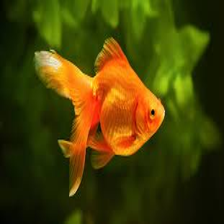

In [5]:
goldfish = Image.open("/content/goldfish.jpeg").resize(Image_Shape)
goldfish

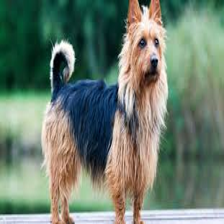

In [14]:
silky_terrier = Image.open("/content/silky terrier.jpeg").resize(Image_Shape)
silky_terrier

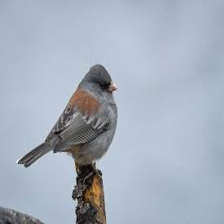

In [15]:
junco = Image.open("/content/junco bird.jpeg").resize(Image_Shape)
junco

##Normalizing pixel values of test sample

In [6]:
goldfish = np.array(goldfish)/255.0
goldfish

array([[[0.01568627, 0.03921569, 0.        ],
        [0.02352941, 0.04313725, 0.        ],
        [0.03137255, 0.05490196, 0.        ],
        ...,
        [0.07058824, 0.08235294, 0.        ],
        [0.07058824, 0.08235294, 0.        ],
        [0.07058824, 0.08235294, 0.        ]],

       [[0.01568627, 0.03921569, 0.        ],
        [0.02352941, 0.04313725, 0.        ],
        [0.03137255, 0.05490196, 0.        ],
        ...,
        [0.07058824, 0.08235294, 0.        ],
        [0.07058824, 0.08235294, 0.        ],
        [0.07058824, 0.08235294, 0.        ]],

       [[0.01568627, 0.03921569, 0.        ],
        [0.02352941, 0.04313725, 0.        ],
        [0.03137255, 0.05490196, 0.        ],
        ...,
        [0.07058824, 0.08235294, 0.        ],
        [0.07058824, 0.08235294, 0.        ],
        [0.07058824, 0.08235294, 0.        ]],

       ...,

       [[0.00392157, 0.01176471, 0.        ],
        [0.00784314, 0.01568627, 0.00392157],
        [0.00784314, 0

In [16]:
silky_terrier = np.array(silky_terrier)/255
junco = np.array(junco)/255

###Final Shape

In [7]:
goldfish.shape

(224, 224, 3)

In [17]:
silky_terrier.shape

(224, 224, 3)

In [18]:
junco.shape

(224, 224, 3)

In [8]:
goldfish[np.newaxis, ...].shape     # adding 1 bcoz only 1 img is used

(1, 224, 224, 3)

In [19]:
silky_terrier[np.newaxis, ...].shape

(1, 224, 224, 3)

In [21]:
junco[np.newaxis, ...].shape

(1, 224, 224, 3)

#Predictions

In [9]:
result_g = classifier.predict(goldfish[np.newaxis, ...])

1/1 [==============================] - 1s 708ms/step


In [10]:
result_g

array([[ 0.2939863 ,  3.2887301 , 10.340297  , ..., -0.6834866 ,
        -1.1616883 , -0.66150564]], dtype=float32)

In [22]:
result_st = classifier.predict(silky_terrier[np.newaxis, ...])
result_j = classifier.predict(junco[np.newaxis, ...])

1/1 [==============================] - 0s 51ms/step


In [23]:
predicted_index_g = np.argmax(result_g)
predicted_index_g

2

In [24]:
pred_index_st = np.argmax(result_st)
pred_index_st

194

In [25]:
pred_index_j = np.argmax(result_j)
pred_index_j

11

# Predicting via labels




In [28]:
image_labels = []
with open("/content/ImageNetLabel.txt", "r") as f:
  image_labels = f.read().splitlines()

image_labels[0:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [29]:
image_labels[predicted_index]   # goldfish

'goldfish'

In [30]:
image_labels[pred_index_st]     # australian silky terrier

'Australian terrier'

In [31]:
image_labels[pred_index_j]     # junco bird -> wrong prediction

'brambling'